In [1]:
import pyodbc
import numpy as np
import pandas as pd

In [2]:
conn = pyodbc.connect(r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\Users\jhemb\Desktop\seha2731.mdb')

In [16]:
conn

In [42]:
cursor = conn.cursor()
cursor.execute('SELECT MaritalStatus,Sex FROM tblPatients;')
# cursor.execute('SELECT tblPatients.MaritalStatus,tblFamilyInfo.RelativeType FROM tblPatients INNER JOIN tblFamilyInfo ON tblPatients.patientID = tblFamilyInfo.patientID;')

In [43]:
data = cursor.fetchall()

In [53]:
column_names = tuple([desc[0] for desc in cursor.description])

In [54]:
tuple(column_names)

('MaritalStatus', 'Sex')

In [56]:
column_names

('MaritalStatus', 'Sex')

In [63]:
df = pd.DataFrame(np.array(data),columns=column_names)

In [64]:
df

,MaritalStatus,Sex
0,W,Male
1,CO,Female
2,D,Female
3,D,Female
4,M,Male
...,...,...
10151,S,Male
10152,S,Female
10153,S,Female
10154,M,Female


In [65]:
df.to_csv(

0          Male
1        Female
2        Female
3        Female
4          Male
          ...  
10151      Male
10152    Female
10153    Female
10154    Female
10155    Female
Name: Sex, Length: 10156, dtype: object

In [69]:
# To see the distribution of calues in the marital status column, we use :
df['MaritalStatus'].value_counts()

M     5056
S     2267
D      963
W      751
CO     211
C       98
c        3
Name: MaritalStatus, dtype: int64

In [70]:
# To see the distribution of sex in our dataset we use
df['Sex'].value_counts()

Female    6989
Male      3167
Name: Sex, dtype: int64

In [73]:
#  We can filter rows based on conditions like gender.
male_data = df[df['Sex'] == 'Male']

In [74]:
male_data['MaritalStatus'].value_counts()

M     1754
S      658
D      211
W      138
CO      74
C       56
c        2
Name: MaritalStatus, dtype: int64

In [75]:
# Now let's use matplotlib to visualize our marital status distribution among patients

In [76]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [77]:
# Calculating the distribution of marital statuses in male data
marital_status_counts = male_data['MaritalStatus'].value_counts()

(-1.099998512526387,
 1.0999998571205187,
 -1.0999994415990557,
 1.099999965636963)

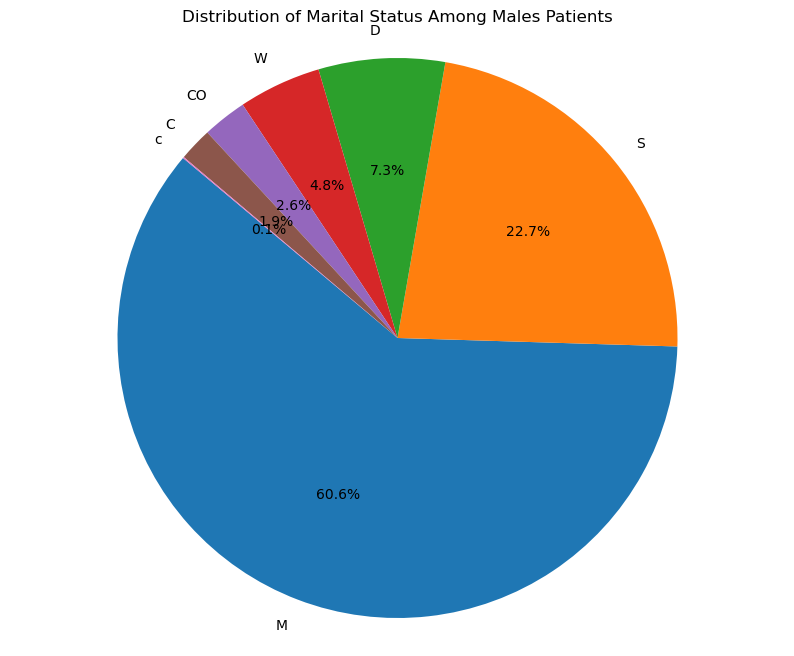

In [79]:
# creating a pie chart
plt.figure(figsize=(10,8))
plt.pie(marital_status_counts,labels=marital_status_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Marital Status Among Males Patients')
plt.axis('equal') # equal aspect ration to ensure pie chart is drawn as a circle